# L4: Exercise: The Sliding Window

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')

Experimenting with Feature Extraction

In [3]:
from Visiontools import edge, blur, bottom_sobel, emboss, sharpen, circle, read_image, show_kernel, show_extraction

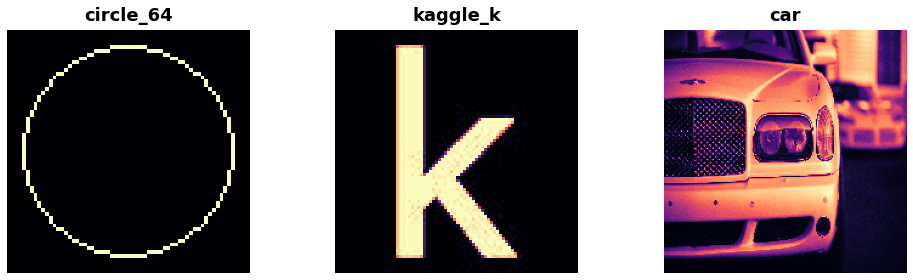

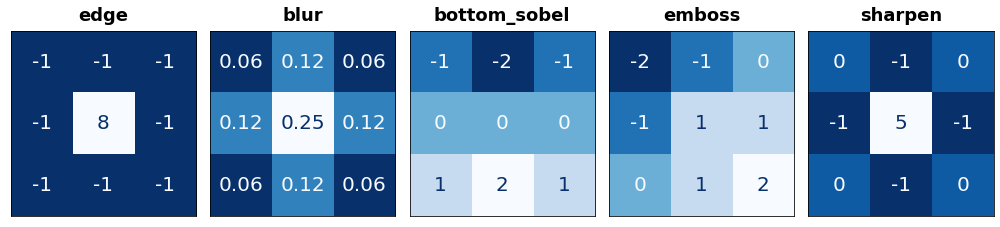

In [4]:
image_dir = 'C:/Amin/Workspace/Data/Kaggle/Computer Vision/archive (1)/'
circle_64 = tf.expand_dims(circle([64, 64], val=1.0, r_shrink=4), axis=-1)
kaggle_k = read_image(image_dir + str('k.jpg'), channels=1)
car = read_image(image_dir + str('car_illus.jpg'), channels=1)
car = tf.image.resize(car, size=[200, 200])
images = [(circle_64, "circle_64"), (kaggle_k, "kaggle_k"), (car, "car")]

plt.figure(figsize=(14, 4))
for i, (img, title) in enumerate(images):
    plt.subplot(1, len(images), i+1)
    plt.imshow(tf.squeeze(img))
    plt.axis('off')
    plt.title(title)
plt.show();

kernels = [(edge, "edge"), (blur, "blur"), (bottom_sobel, "bottom_sobel"),
           (emboss, "emboss"), (sharpen, "sharpen")]
plt.figure(figsize=(14, 4))
for i, (krn, title) in enumerate(kernels):
    plt.subplot(1, len(kernels), i+1)
    show_kernel(krn, digits=2, text_size=20)
    plt.title(title)
plt.show()

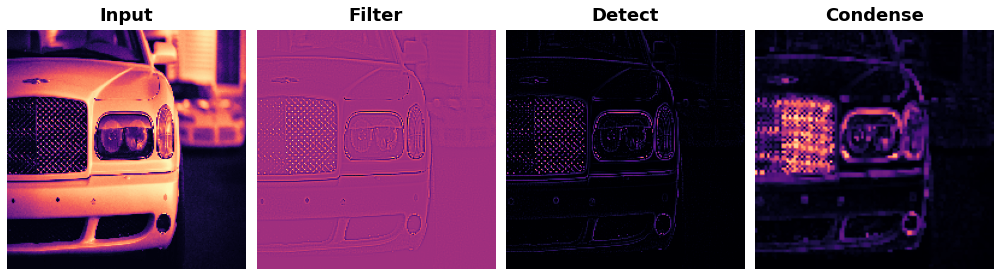

In [5]:
# choose an image
image = car

# choose a kernel
kernel = edge

show_extraction(
    image, kernel,

    # set parameters
    conv_stride=1,
    conv_padding='valid',
    pool_size=3,
    pool_stride=2,
    pool_padding='same',
    
    subplot_shape=(1, 4),
    figsize=(14, 6),
)

The Receptive Field/Growing the Receptive Field

Both create the same receptive field: three (3, 3) kernels (27 parameters), while one (7, 7) kernel (49 parameters).


One-Dimensional Convolution

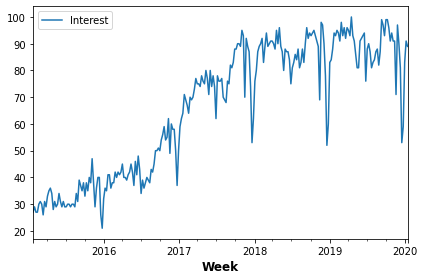

In [6]:
# Load the time series as a Pandas dataframe
machinelearning = pd.read_csv(
    'C:/Amin/Workspace/Data/Kaggle/Computer Vision/archive (1)/machinelearning.csv',
    parse_dates=['Week'],
    index_col='Week',
)

machinelearning.plot();

some kernels sometimes used on time-series data:

In [7]:
detrend = tf.constant([-1, 1], dtype=tf.float32)

average = tf.constant([0.2, 0.2, 0.2, 0.2, 0.2], dtype=tf.float32)

spencer = tf.constant([-3, -6, -5, 3, 21, 46, 67, 74, 67, 46, 32, 3, -5, -6, -3], dtype=tf.float32) / 320

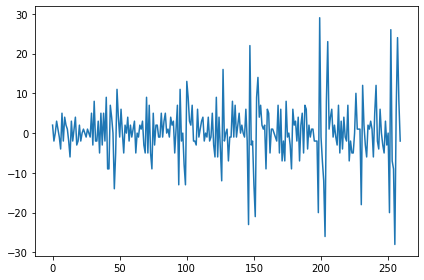

In [8]:
# UNCOMMENT ONE
kernel = detrend
# kernel = average
# kernel = spencer

# Reformat for TensorFlow
ts_data = machinelearning.to_numpy()
ts_data = tf.expand_dims(ts_data, axis=0)
ts_data = tf.cast(ts_data, dtype=tf.float32)
kern = tf.reshape(kernel, shape=(*kernel.shape, 1, 1))

ts_filter = tf.nn.conv1d(
    input=ts_data,
    filters=kern,
    stride=1,
    padding='VALID',
)

# Format as Pandas Series
machinelearning_filtered = pd.Series(tf.squeeze(ts_filter).numpy())

machinelearning_filtered.plot();

- detrend kernel filters for changes in the series
- average and spencer are both "smoothers" that filter for low-frequency components in the series

Convnets are not often the best choice on their own for these kinds of problems. They are often incorporated into other models for their feature extraction capabilities.